In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Health_AnimalBites.csv')
df.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


This dataset includes information on over 9,000 animal bites which occurred near Louisville, Kentucky from 1985 to 2017 and includes information on whether the animal was quarantined after the bite occurred and whether that animal was rabid.

### Column Descriptions
bite_date: The date the bite occurred


SpeciesIDDesc: The species of animal that did the biting


BreedIDDesc: Breed (if known)


GenderIDDesc: Gender (of the animal)


color: color of the animal


vaccination_yrs: how many years had passed since the last vaccination


vaccination_date: the date of the last vaccination


victim_zip: the zipcode of the victim


AdvIssuedYNDesc: whether advice was issued


WhereBittenIDDesc: Where on the body the victim was bitten


quarantine_date: whether the animal was quarantined


DispositionIDDesc: whether the animal was released from quarantine


headsentdate: the date the animal’s head was sent to the lab


release_date: the date the animal was released


ResultsIDDesc: results from lab tests (for rabies)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.0+ MB


In [3]:
df.nunique()

bite_date            2702
SpeciesIDDesc           9
BreedIDDesc           101
GenderIDDesc            3
color                 712
vaccination_yrs         4
vaccination_date     2107
victim_zip            233
AdvIssuedYNDesc         2
WhereBittenIDDesc       3
quarantine_date       602
DispositionIDDesc       4
head_sent_date        325
release_date          582
ResultsIDDesc           3
dtype: int64

# Are dogs really man's best friend?

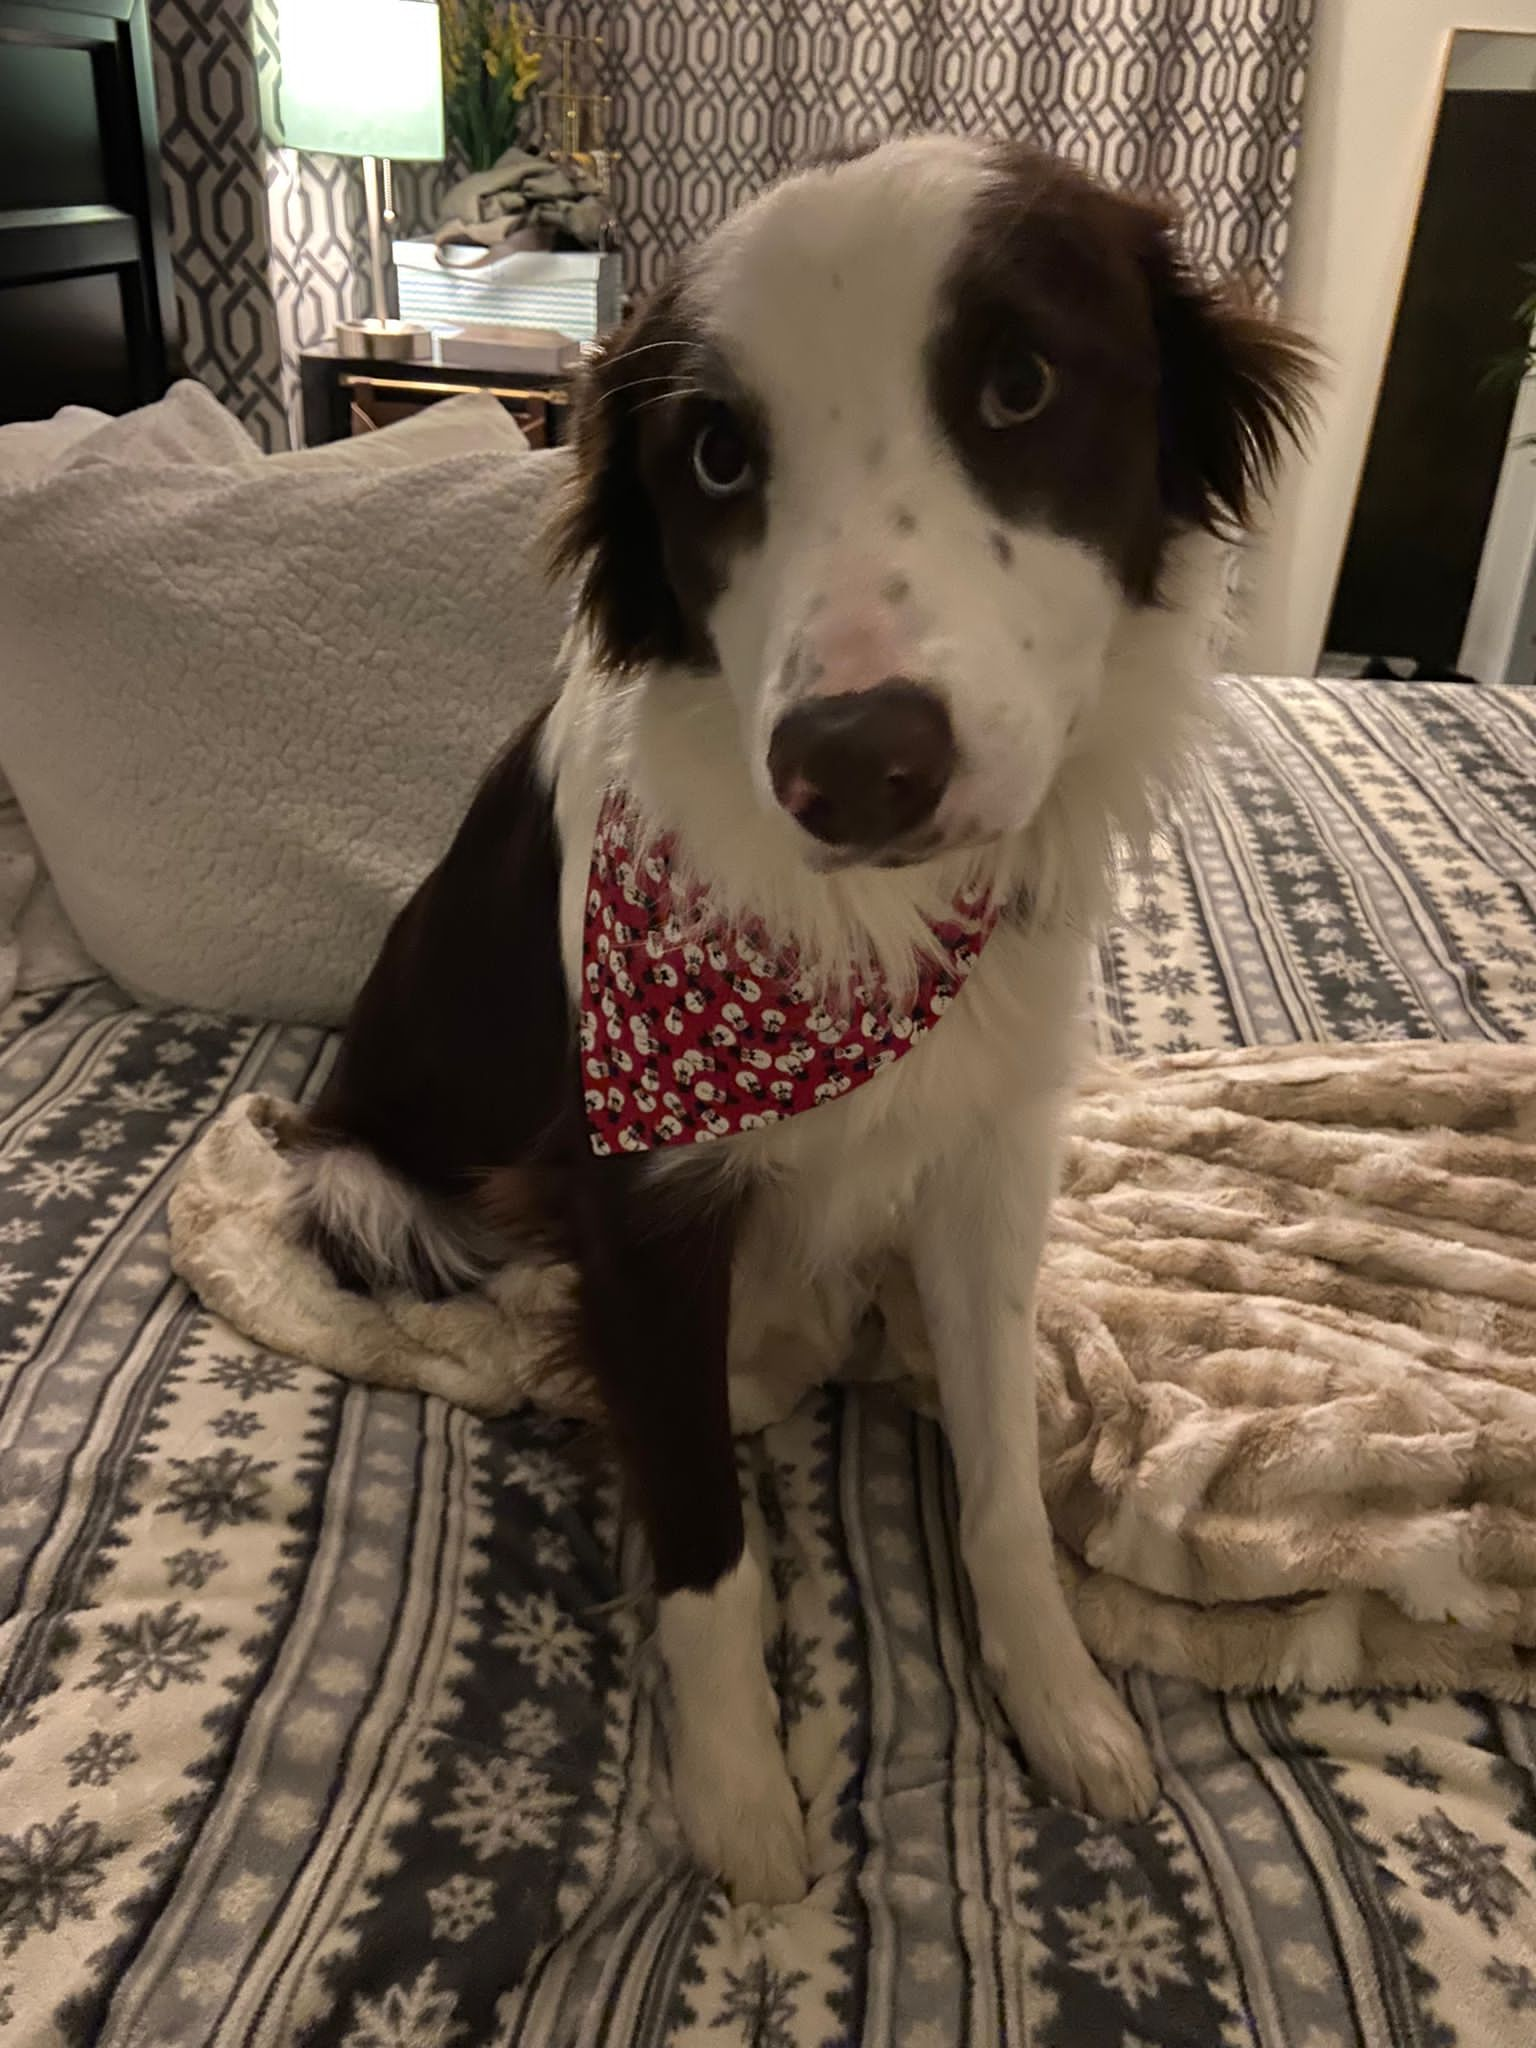

In [4]:
from IPython.display import Image, display

#Load an image file from a file
image = Image(filename='Tito.jpg', width=200, height=200)

#Display the image
display(image)


This is my sister's dog Tito.  He is a border collie -- super smart, easy and fun to train, knows all the tricks, loves to play fetch.  He was the goodest good boy, until he bit someone: a little girl.  It was a beautiful summer day, and we were at the local Brewery, enjoying cold drinks and good company.  Tito was playing fetch and running around with some kids.  My sister had warned them Tito wasn't great with kids.  Everything was going fine.  Lots of laughing, running, and fetching.  When out of the blue, there was a little commotion, and the youngest, a four year old girl, started crying.  Tito had bit her in the face.  No one saw it happen.  No one can explain why.  My sister was horrified and is still tramatized two years later.  She lost her trust in Tito.  She kept him, but now he never meets new people, he never goes to the dog park, and he never gets to be off leash.  The little girl was very scared and left with her parents for the hospital where she received a few stitches.

Now we lovingly refer to Tito as the goodest bad dog around.

So I wanted to look into animal bites.  I wanted to see what the data had to say.  Who is biting?  Who is getting bit?  What are the consequences?  Can we do anything to avoid the trama of getting bit, as well as the trama of having your dog bite someone?

## Who is biting?

Text(0.5, 1.0, 'Biting by Species')

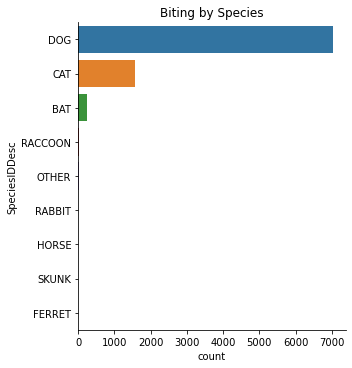

In [5]:
sns.catplot(y = 'SpeciesIDDesc', data = df, kind = 'count')
plt.title('Biting by Species')

In [6]:
df['SpeciesIDDesc'].value_counts(normalize = True)

DOG        0.791109
CAT        0.176477
BAT        0.026674
RACCOON    0.003039
OTHER      0.001238
HORSE      0.000563
FERRET     0.000450
RABBIT     0.000338
SKUNK      0.000113
Name: SpeciesIDDesc, dtype: float64

So let's just take a look at dogs considering they do almost 80% of the reported biting in this particular dataset.

In [7]:
dogs_df = df[df['SpeciesIDDesc'] == "DOG"]

In [8]:
dogs_df.isna().sum()

bite_date              97
SpeciesIDDesc           0
BreedIDDesc          3274
GenderIDDesc         1657
color                1689
vaccination_yrs      3817
vaccination_date     3485
victim_zip           1328
AdvIssuedYNDesc      5005
WhereBittenIDDesc     299
quarantine_date      5384
DispositionIDDesc    5803
head_sent_date       6924
release_date         5780
ResultsIDDesc        5991
dtype: int64

### Gender

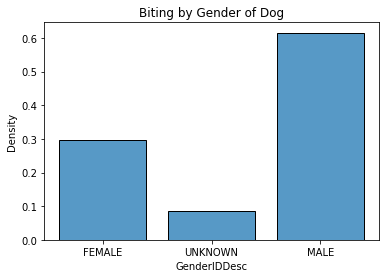

In [9]:
_ = sns.histplot(x = dogs_df['GenderIDDesc'], stat = 'density', shrink = 0.8)
_ = plt.title('Biting by Gender of Dog')

In [10]:
df['GenderIDDesc'].value_counts(normalize = True)

MALE       0.591632
FEMALE     0.311255
UNKNOWN    0.097113
Name: GenderIDDesc, dtype: float64

Here we see almost 60% of the reported dog bites were male dogs.

### Top  10 Biting Dogs

In [11]:
top_ten = dogs_df[['BreedIDDesc']].value_counts(normalize = True).head(10)

In [12]:
top_ten = pd.DataFrame(top_ten, columns = ['Percent']).reset_index()

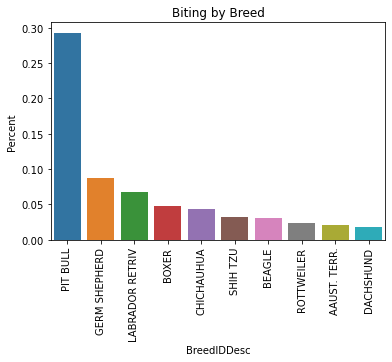

In [13]:
_ = sns.barplot(x=top_ten['BreedIDDesc'], y = top_ten["Percent"])
_ = plt.xticks(rotation=90)
_ = plt.title('Biting by Breed')

Of the top ten, some may not surprise you: Pit Bull, German Shepherd, Rottweiler.  These dogs are often labeled as dangerous or used for protection.  Especially surprising to me was the Labrador Retriever, which seems to be America's most famous and lovable family dog.

### What else do we know about the bites?

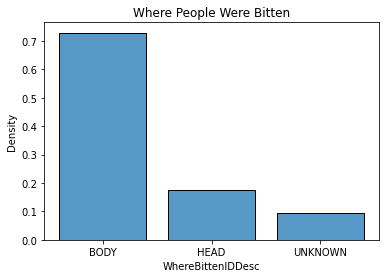

In [14]:
_ = sns.histplot(x = dogs_df['WhereBittenIDDesc'], stat = 'density', shrink = 0.8)
_ = plt.title('Where People Were Bitten')

In [15]:
dogs_df['WhereBittenIDDesc'].value_counts(normalize = True)

BODY       0.729421
HEAD       0.175929
UNKNOWN    0.094651
Name: WhereBittenIDDesc, dtype: float64

## Where does that leave us?

Are we now to avoid all dogs?  Well, at least male dogs, or at least male pitbulls?  I would argue no.  It is good to know the data and be informed, but there is always more to the story.

Tito is a male, but not a pitbull, and bit the head.  It was unexpected and shocking and horrible for everyone involved.  But I don't want to leave with just presenting the data from Kentucky and my own unfortunate story.  What do we do now that we know the data (or at least this particular dataset) and we also know other dogs bite that don't follow the "trends"?

I'd like to leave you with advice from the American Kennel Club (AKC) for your future proceedings with dogs:


https://www.akc.org/expert-advice/training/dog-bite-prevention/


1. Always ask, “May I pet your dog?”


2. Slowly present the back of your hand first for the dog to smell


3. Do not run toward a dog


4. Never bark or growl at a dog


5. All dogs can bite because all dogs have teeth


6. Never leave young children and dogs unattended (Do not assume a dog is ‘safe’ and ‘will never bite.’)


7. Teach proper manners around the dog for everyone in the family (no riding, sitting, pulling, bothering)


8. ‘Stand like a tree’ around loose dogs


9. Service dogs are working and should not be bothered


10. A dog is not a person